# **📌 다음 분기에 어떤 게임을 설계해야할까**
1️⃣ 지역에 따라서 선호하는 게임 장르가 다른가

2️⃣ 연도별 게임의 트렌드가 있는가

3️⃣ 출고량이 높은 게임

4️⃣ 분석 결과

# **📎 Data Description**
✔︎ Name : 게임의 이름입니다.  
✔︎ Platform : 게임이 지원되는 플랫폼의 이름입니다.  
✔︎ Year : 게임이 출시된 연도입니다.  
✔︎ Genre : 게임의 장르입니다.  
✔︎ Publisher : 게임을 제작한 회사입니다.  
✔︎ NA_Sales : 북미지역에서의 출고량입니다.  
✔︎ EU_Sales : 유럽지역에서의 출고량입니다.  
✔︎ JP_Sales : 일본지역에서의 출고량입니다.  
✔︎ Other_Sales : 기타지역에서의 출고량입니다.

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
from google.colab import files
files.upload();

Saving vgames2.csv to vgames2 (5).csv


In [86]:
# 데이터 불러오기
df = pd.read_csv('vgames2.csv', index_col=0)

In [87]:
# 전처리를 위한 복사본 만들기
df_clean = df.copy()

In [88]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.3+ MB


In [89]:
# 결측치 확인
df_clean.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [90]:
df_clean['Year'].describe()

count    16327.000000
mean      1994.242543
std        155.077168
min          0.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [91]:
df_clean['Year'].unique()

array([2.008e+03, 2.009e+03, 2.010e+03, 2.005e+03, 2.011e+03, 2.007e+03,
       2.001e+03, 2.003e+03, 2.006e+03, 2.014e+03, 2.015e+03, 2.002e+03,
       1.997e+03, 2.013e+03, 1.996e+03, 2.004e+03, 2.000e+03,       nan,
       1.984e+03, 1.998e+03, 2.016e+03, 1.985e+03, 1.999e+03, 9.000e+00,
       9.700e+01, 1.995e+03, 1.993e+03, 2.012e+03, 1.987e+03, 1.982e+03,
       1.100e+01, 1.994e+03, 1.990e+03, 1.500e+01, 1.992e+03, 1.991e+03,
       1.983e+03, 1.988e+03, 1.981e+03, 3.000e+00, 1.989e+03, 9.600e+01,
       6.000e+00, 8.000e+00, 1.986e+03, 1.000e+00, 5.000e+00, 4.000e+00,
       1.000e+01, 9.800e+01, 7.000e+00, 1.600e+01, 8.600e+01, 1.400e+01,
       9.500e+01, 2.017e+03, 1.980e+03, 2.020e+03, 2.000e+00, 1.300e+01,
       0.000e+00, 1.200e+01, 9.400e+01])

In [92]:
# Year 피쳐 결측치 제거
year_null = df_clean[df_clean['Year'].isnull()].index

In [93]:
df_clean = df_clean.drop(year_null)

In [94]:
df_clean[df_clean['Year'].isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [95]:
# Year 피쳐 소숫점 제거 및 타입 변환
df_clean['Year'] = df_clean['Year'].astype(str).str.split('.').str[0].astype(int)

In [96]:
df_clean['Year'].dtypes

dtype('int64')

In [97]:
df_clean['Year'].value_counts()

2009    1421
2008    1418
2010    1252
2007    1199
2011    1129
        ... 
13         2
12         2
86         1
2020       1
94         1
Name: Year, Length: 62, dtype: int64

In [98]:
df_clean.query('Year <= 20')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
75,Age of Empires III: Complete Collection,PC,9,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
214,NASCAR Unleashed,PS3,11,Racing,Activision,0.09,0,0,0.01
305,Kung Fu Panda: Showdown of Legendary Legends,PS3,15,Action,Little Orbit,0,0.02,0,0
769,NASCAR Thunder 2004,PS2,3,Racing,Electronic Arts,0.53,0.41,0,0.14
1016,Wolfenstein,PC,9,Shooter,Activision,0.01,0.03,0,0.01
...,...,...,...,...,...,...,...,...,...
15613,Rally Fusion: Race of Champions,PS2,2,Racing,Activision,0.06,0.05,0,0.02
15837,Theatrhythm Dragon Quest,3DS,15,Misc,Square Enix,0,0,0.15,0
16104,Fab 5 Soccer,DS,8,Sports,Destineer,0.01,0,0,0
16150,Dragon Ball Z: Burst Limit,X360,8,Fighting,Atari,0.24,0.18,0.03,0.05


In [99]:
# Year 피쳐에서 20이하 값에 2000 더해주기
def year_plus(x):
  if x < 20:
    return x + 2000
  else:
    return x

In [100]:
df_clean['Year'] = df_clean['Year'].apply(year_plus)

In [101]:
len(df_clean.query('Year <= 20'))

0

In [102]:
# Year 피쳐 범위 조정 2010 ~ 2016
df_clean = df_clean.query('Year >= 2010 and Year <= 2016')
df_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
7,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0,0
10,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0,0.01
...,...,...,...,...,...,...,...,...,...
16582,LEGO The Hobbit,XOne,2014,Action,Warner Bros. Interactive Entertainment,0.13,0.12,0,0.02
16589,MindJack,PS3,2011,Shooter,Square Enix,0.07,0.08,0,0.03
16591,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010,Adventure,Aqua Plus,0,0,0.05,0
16596,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13


In [103]:
# Genre 피쳐 결측치 제거
genre_null = df_clean[df_clean['Genre'].isnull()].index

In [104]:
df_clean = df_clean.drop(genre_null)

In [105]:
df_clean['Genre'].isnull().sum()

0

In [106]:
# Publisher 피쳐 결측치 제거
publisher_null = df_clean[df_clean['Publisher'].isnull()].index

In [107]:
df_clean = df_clean.drop(publisher_null)

In [108]:
df_clean['Publisher'].isnull().sum()

0

In [109]:
publisher_unknown = df_clean.query('Publisher == "Unknown"').index

In [110]:
df_clean = df_clean.drop(publisher_unknown)

In [111]:
df_clean.query('Publisher == "Unknown"')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [112]:
# 중복 값 확인
df_clean[df_clean.duplicated()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [113]:
# 인덱스 재설정
df_clean.reset_index(drop=True, inplace=True)

In [114]:
df_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,0.02,0
1,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0,0,0
2,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0,0.04
3,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0,0
4,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0,0.01
...,...,...,...,...,...,...,...,...,...
5030,LEGO The Hobbit,XOne,2014,Action,Warner Bros. Interactive Entertainment,0.13,0.12,0,0.02
5031,MindJack,PS3,2011,Shooter,Square Enix,0.07,0.08,0,0.03
5032,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010,Adventure,Aqua Plus,0,0,0.05,0
5033,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13


In [115]:
# Sales 피쳐 단위 맞추기 K -> *0.001, M -> *1

In [116]:
#df_clean['NA_Sales'].iloc[sales_index].str.replace('K','').astype(float).map(lambda x:x*0.001)

In [117]:
def change_sales(x):
  if 'K' in x:
    x = x.replace('K','')
    x = float(x)
    return x*0.001 
  elif 'M' in x:
    x = x.replace('M','')
    x = float(x)
    return x
  else:
    return float(x)

In [118]:
df_clean['NA_Sales'] = df_clean['NA_Sales'].apply(change_sales)
df_clean['EU_Sales'] = df_clean['EU_Sales'].apply(change_sales)
df_clean['JP_Sales'] = df_clean['JP_Sales'].apply(change_sales)
df_clean['Other_Sales'] = df_clean['Other_Sales'].apply(change_sales)

In [119]:
print(len(df_clean[df_clean['NA_Sales'].astype(str).str.contains('[K-M,*]')]))
print(len(df_clean[df_clean['EU_Sales'].astype(str).str.contains('[K-M,*]')]))
print(len(df_clean[df_clean['JP_Sales'].astype(str).str.contains('[K-M,*]')]))
print(len(df_clean[df_clean['Other_Sales'].astype(str).str.contains('[K-M,*]')]))

0
0
0
0


In [120]:
df_clean.dtypes

Name            object
Platform        object
Year             int64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [121]:
#All_Sales 피쳐 생성
df_clean['All_Sales'] = df_clean['NA_Sales'] + df_clean['EU_Sales'] + df_clean['JP_Sales'] + df_clean['Other_Sales']

In [122]:
df_clean

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,All_Sales
0,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
1,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
2,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25
3,JASF: Jane's Advanced Strike Fighters,PC,2011,Simulation,Deep Silver,0.02,0.01,0.00,0.00,0.03
4,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011,Action,THQ,0.04,0.03,0.00,0.01,0.08
...,...,...,...,...,...,...,...,...,...,...
5030,LEGO The Hobbit,XOne,2014,Action,Warner Bros. Interactive Entertainment,0.13,0.12,0.00,0.02,0.27
5031,MindJack,PS3,2011,Shooter,Square Enix,0.07,0.08,0.00,0.03,0.18
5032,White Album: Tsuzurareru Fuyu no Omoide,PS3,2010,Adventure,Aqua Plus,0.00,0.00,0.05,0.00,0.05
5033,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79


# 1️⃣ 지역에 따라서 선호하는 게임 장르가 다른가

In [123]:
#지역에 따라서 선호하는 게임 장르가 다를까
sale_group = df_clean.groupby('Genre', as_index=False)[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
sale_group

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,286.08,234.66,69.39,77.78
1,Adventure,20.52,18.99,15.18,5.84
2,Fighting,38.56,20.77,13.75,8.45
3,Misc,122.62,64.01,21.36,20.08
4,Platform,55.47,38.55,15.75,10.83
5,Puzzle,9.35,6.62,3.40,1.60
6,Racing,45.54,55.49,6.65,15.85
7,Role-Playing,101.16,69.26,94.74,22.90
8,Shooter,227.42,166.41,13.54,55.02
9,Simulation,26.39,25.10,13.20,5.97


In [124]:
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'

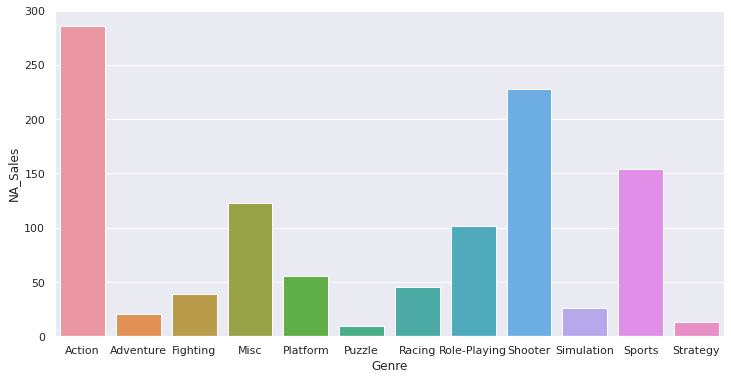

In [148]:
# 북미 지역 장르에 따른 출고량
sns.barplot(data=sale_group, x='Genre', y='NA_Sales')
sns.set(rc = {'figure.figsize':(12,6)})

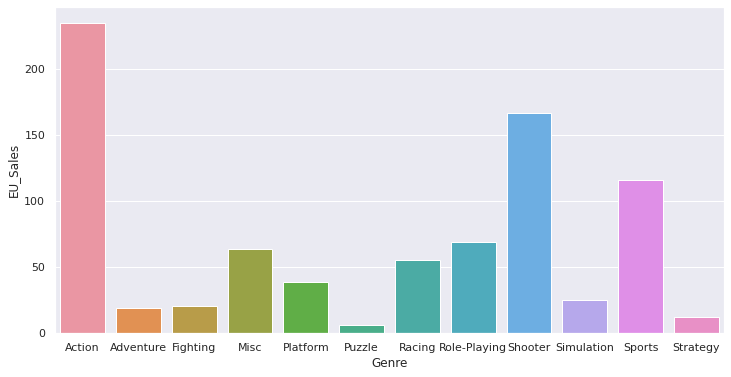

In [126]:
# 유럽 지역 장르에 따른 출고량
sns.barplot(data=sale_group, x='Genre', y='EU_Sales')
sns.set(rc = {'figure.figsize':(12,6)})

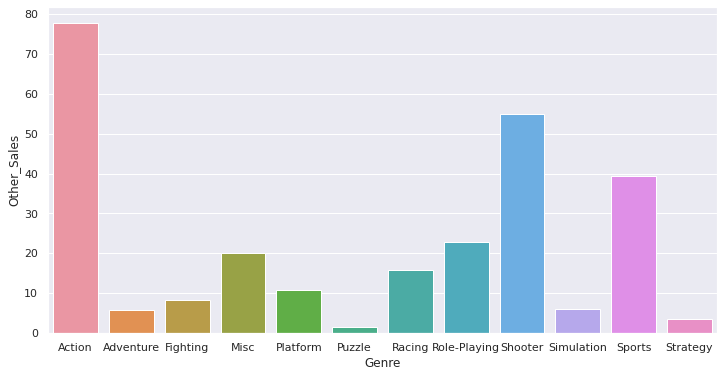

In [127]:
# 기타 지역 장르에 따른 출고량
sns.barplot(data=sale_group, x='Genre', y='Other_Sales')
sns.set(rc = {'figure.figsize':(12,6)})

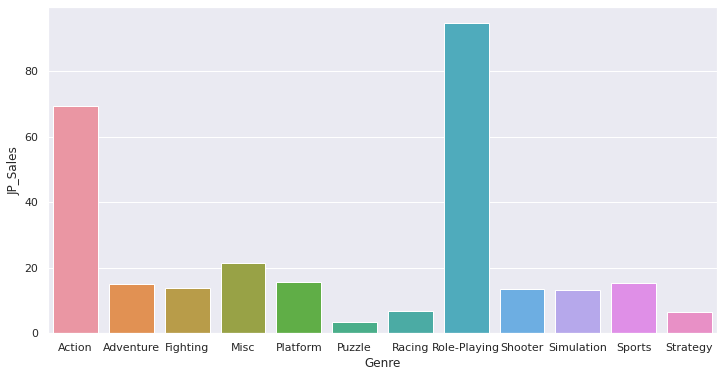

In [128]:
# 일본 지역 장르에 따른 출고량
sns.barplot(data=sale_group, x='Genre', y='JP_Sales')
sns.set(rc = {'figure.figsize':(12,6)})

☑️ 그래프를 통해 확인해봤을 때, 일본 지역을 제외하고 '액션', '슈터', '스포츠' 장르를 선호하는 것을 알 수 있습니다. 하지만 육안상으로 봤을 때 또 다른 장르들과의 관계를 고려한 비교가 어려우므로 검증이 필요할 것 같습니다.

# ⚖️ ANOVA TEST 를 통한 검증

✔️ 세 개 이상의 집단의 차이를 통계적으로 검정하는 방법  


> # 🔎  가설  
> ‣ 지역에 따라 선호하는 게임 장르가 다르지 않다.(귀무가설)  
> ‣ 지역에 따라 선호하는 게임 장르가 다르다.(대립가설)

In [129]:
import scipy.stats as stats
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
%matplotlib inline

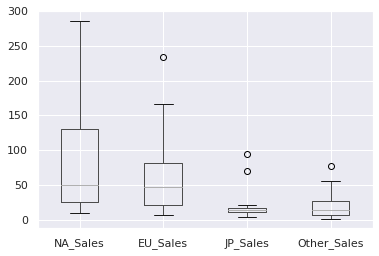

In [130]:
# 어떠한 분포를 지니고 있을지에 대한 시각화
sale_group.boxplot()

In [153]:
#Statsmodel을 사용한 일원분산분석
model = ols('NA_Sales ~ Other_Sales', sale_group).fit()

print(anova_lm(model))

               df        sum_sq       mean_sq           F        PR(>F)
Other_Sales   1.0  86982.206623  86982.206623  325.829749  5.833968e-09
Residual     10.0   2669.560002    266.956000         NaN           NaN


💡 ANOVA 테스트 결과 p-value(PR) 값이 0.05보다 작습니다. 대립가설을 채택하였을 때 오류가 5% 미만이라는 것을 의미하므로 '지역별로 선호하는 장르가 다르다.'라는 대립 가설을 채택합니다.

# 2️⃣ 연도별 게임의 트렌드가 있는가

In [132]:
#연도별 게임의 트렌드가 있을까
year_group = df_clean.groupby(['Year', 'Genre'], as_index=False)['All_Sales'].sum()
year_group

,Year,Genre,All_Sales
0,2010,Action,116.56
1,2010,Adventure,16.42
2,2010,Fighting,14.88
3,2010,Misc,88.01
4,2010,Platform,31.98
...,...,...,...
78,2016,Role-Playing,6.65
79,2016,Shooter,18.17
80,2016,Simulation,0.39
81,2016,Sports,14.63


# 🔎 트렌트란?  

> 유행이 일시적이라면 트렌트는 어떤 현상에서 지속성과 일정한 방향(경향, 동향, 추세)을 나타내는 것이라고 할 수 있습니다.





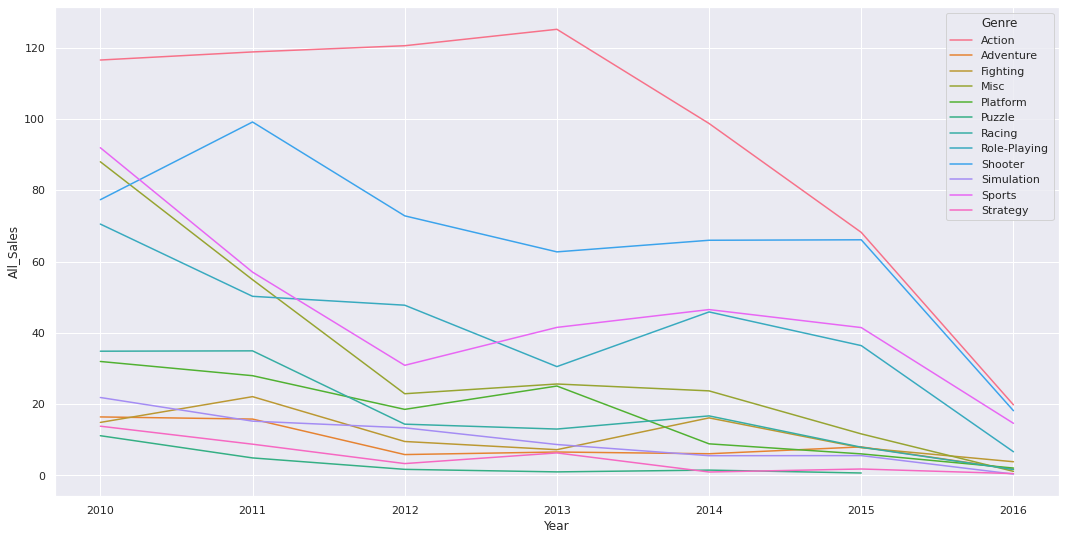

In [155]:
sns.lineplot(data=year_group, x='Year', y='All_Sales', hue='Genre')
sns.set(rc = {'figure.figsize':(18,9)})
# 연도별 장르의 전체 출고량 변화

In [134]:
year_group_NA = df_clean.groupby(['Year','Genre'], as_index=False)['NA_Sales'].sum()

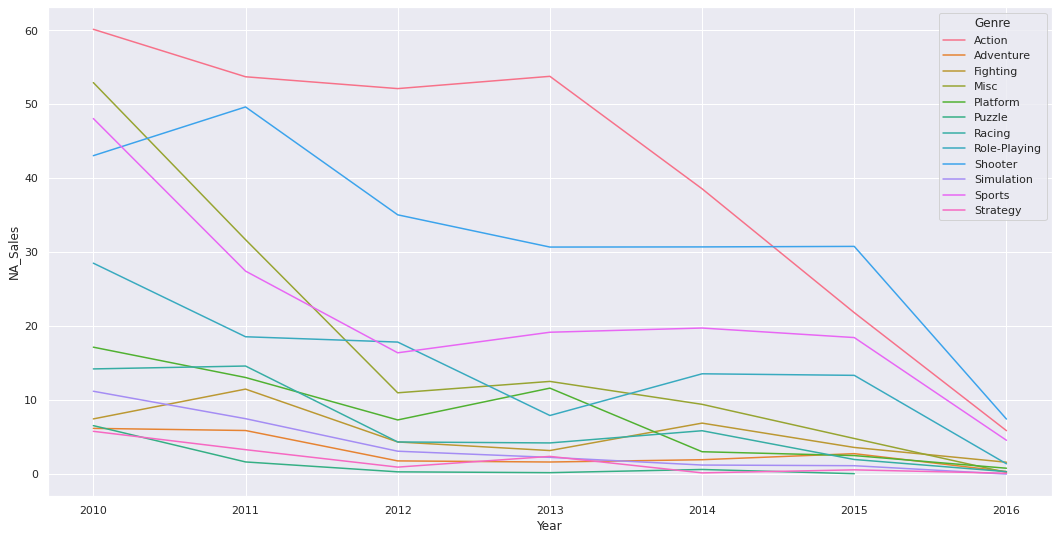

In [135]:
sns.lineplot(data=year_group_NA, x='Year', y='NA_Sales', hue='Genre')
sns.set(rc = {'figure.figsize':(18,9)})
# 연도별 장르의 북미 출고량 변화

In [136]:
year_group_EU = df_clean.groupby(['Year','Genre'], as_index=False)['EU_Sales'].sum()

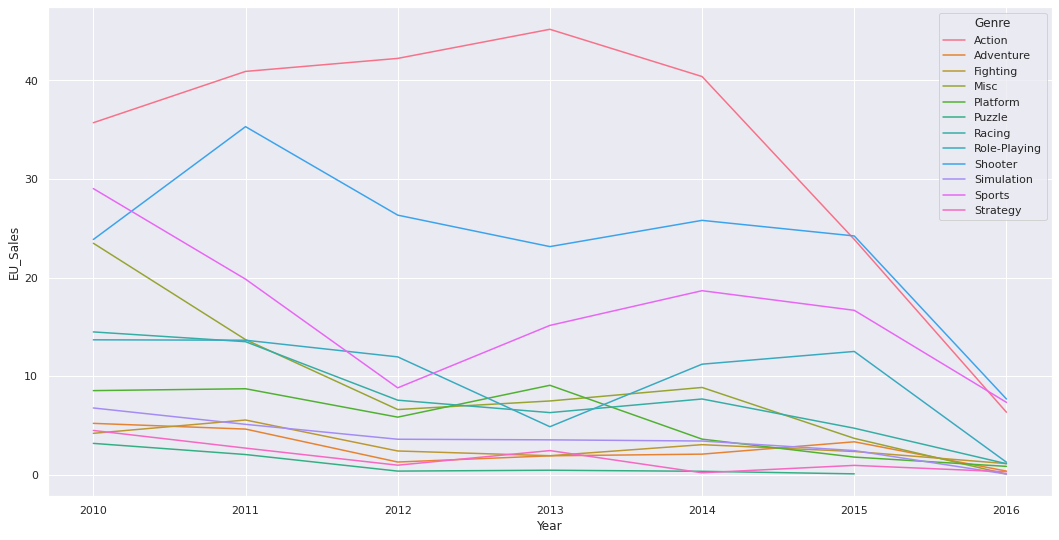

In [137]:
sns.lineplot(data=year_group_EU, x='Year', y='EU_Sales', hue='Genre')
sns.set(rc = {'figure.figsize':(18,9)})
# 연도별 장르의 유럽 출고량 변화

In [140]:
year_group_Other = df_clean.groupby(['Year','Genre'], as_index=False)['Other_Sales'].sum()

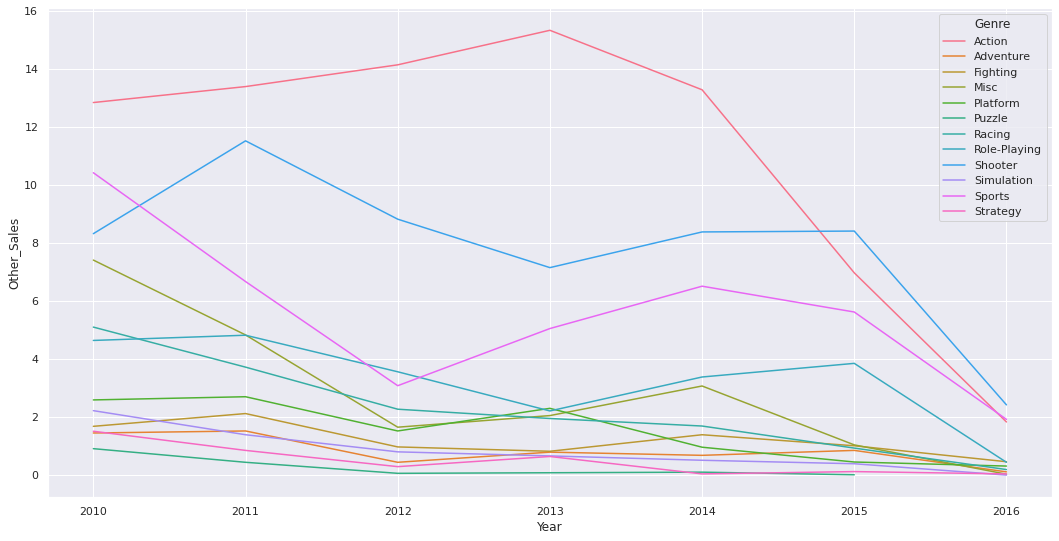

In [141]:
sns.lineplot(data=year_group_Other, x='Year', y='Other_Sales', hue='Genre')
sns.set(rc = {'figure.figsize':(18,9)})
# 연도별 장르의 기타지역 출고량 변화

In [138]:
year_group_JP = df_clean.groupby(['Year','Genre'], as_index=False)['JP_Sales'].sum()

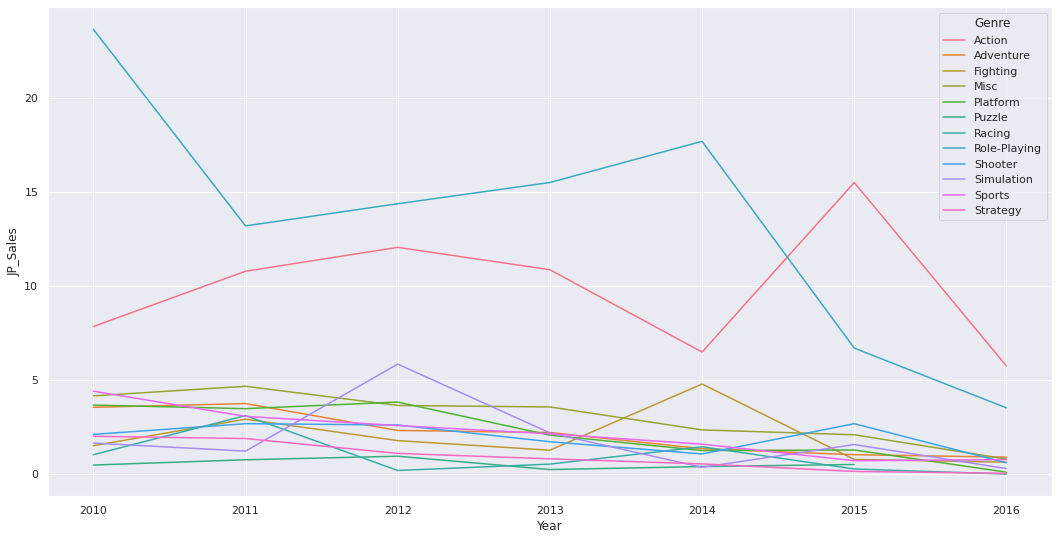

In [139]:
sns.lineplot(data=year_group_JP, x='Year', y='JP_Sales', hue='Genre')
sns.set(rc = {'figure.figsize':(18,9)})
# 연도별 장르의 일본 출고량 변화

☑️ '트렌드가 있다'라는 것은 어떤 현상에서 지속성을 나타내는 것인데 전체 출고량 변화에서 '액션', '슈터' 장르의 출고량이 몇 년간 상위권에 있는 것으로 보아 트렌드가 있다고 말할 수 있습니다.

☑️ 지역별로는 일본 지역에서 '롤플레잉'과 '액션' 장르가 트렌드이고 나머지 지역에서는 '액션', '슈터' 장르가 트렌드인 것을 확인해볼 수 있습니다.

# 3️⃣ 출고량이 높은 게임에 대한 분석

In [142]:
#출고량이 높은 게임에 대한 분석 및 시각화 프로세스
sales_ten = df_clean.groupby(['Name','Genre'], as_index=False)['All_Sales'].sum().sort_values(by='All_Sales', ascending=False).head(10)
sales_ten

,Name,Genre,All_Sales
992,Grand Theft Auto V,Action,55.92
316,Call of Duty: Modern Warfare 3,Shooter,30.84
314,Call of Duty: Black Ops II,Shooter,29.73
312,Call of Duty: Black Ops,Shooter,29.41
315,Call of Duty: Ghosts,Shooter,27.37
313,Call of Duty: Black Ops 3,Shooter,25.30
1630,Minecraft,Misc,23.75
311,Call of Duty: Advanced Warfare,Shooter,21.89
1336,Kinect Adventures!,Misc,21.82
2644,The Elder Scrolls V: Skyrim,Role-Playing,19.28


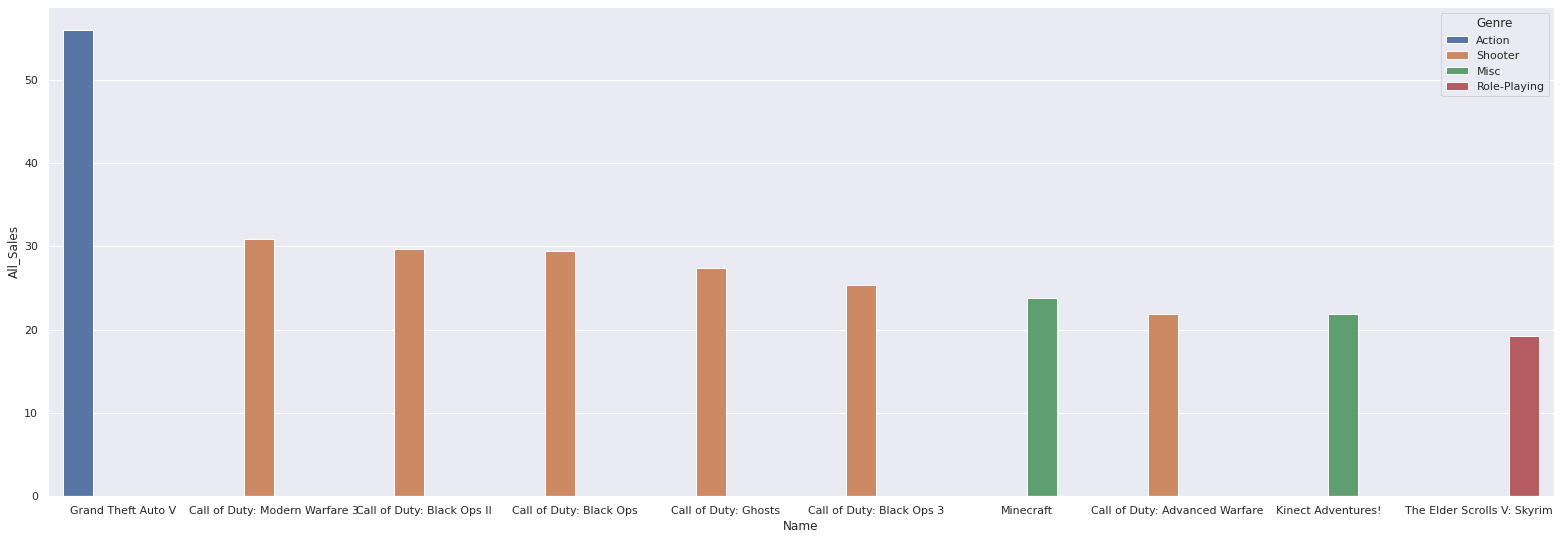

In [157]:
sns.barplot(data=sales_ten, x='Name', y='All_Sales', hue='Genre')
sns.set(rc = {'figure.figsize':(27,9)})
#게임 이름에 따른 전체 출고량 Top10

☑️ 게임 이름에 따른 전체 출고량을 확인해봤을 때 시리즈 별로 출시하고 있는 'Call of Duty'의 출고량이 많을것으로 보입니다.

In [144]:
call_series = df_clean[df_clean['Name'].str.contains('Call of Duty')].sort_values(by='Year')

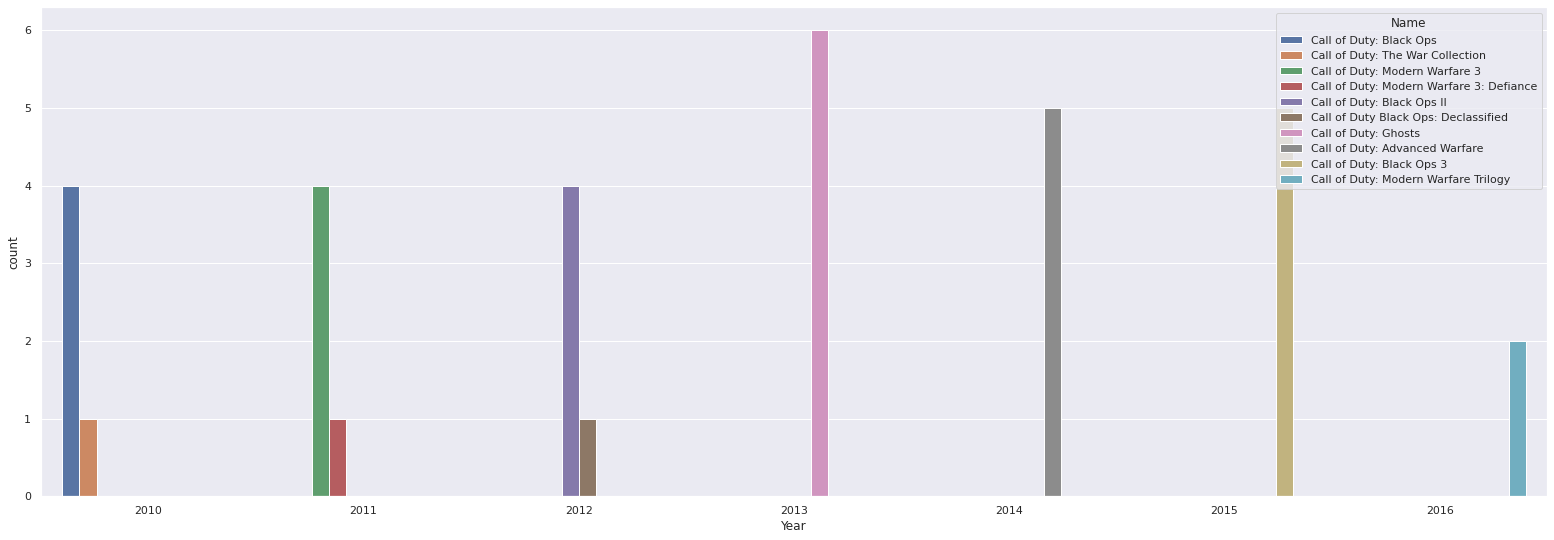

In [145]:
sns.countplot(data=call_series, x='Year', hue='Name')
sns.set(rc = {'figure.figsize':(30,10)})
# 연도별 'Call of Duty' 시리즈 출시

☑️ 'Call of Duty'가 연도별로 출시되고 있음을 알 수 있습니다.

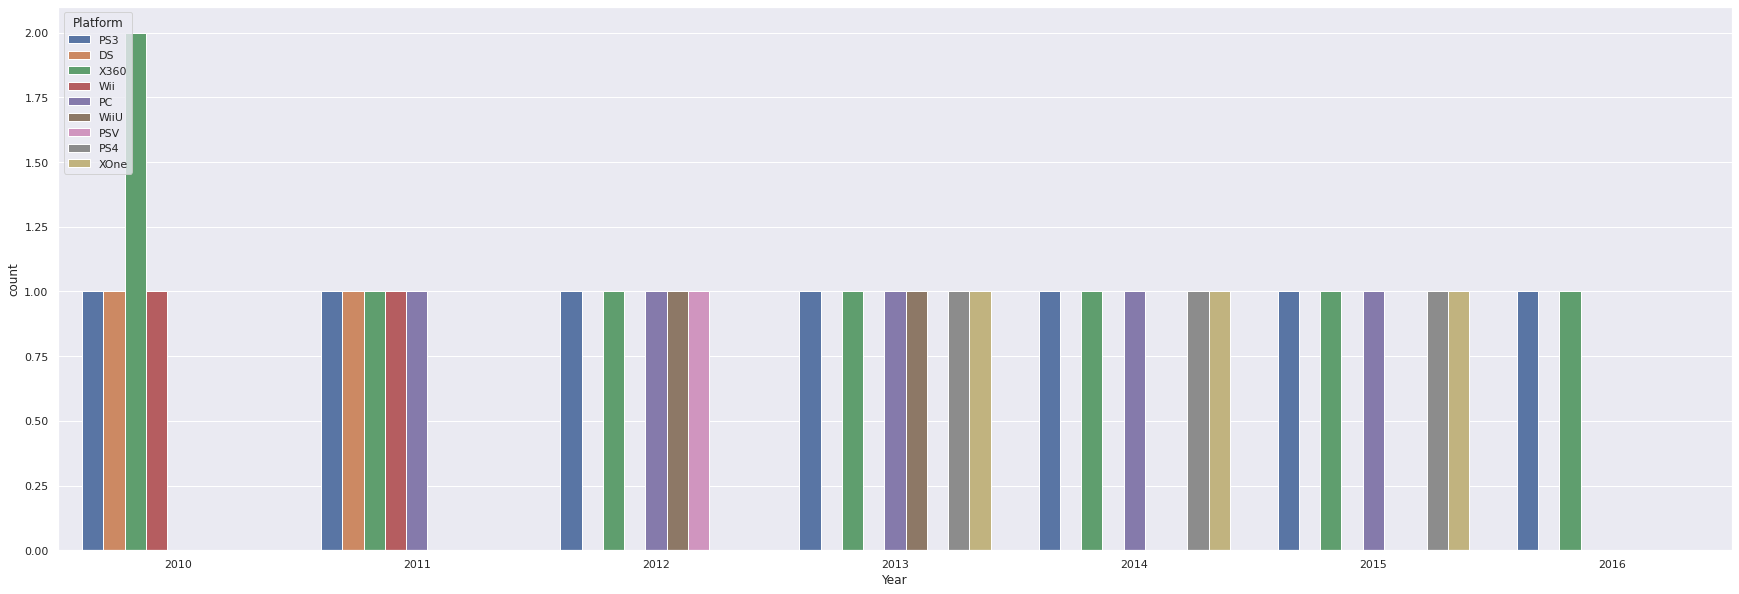

In [146]:
sns.countplot(data=call_series, x='Year', hue='Platform')
sns.set(rc = {'figure.figsize':(30,10)})
# 연도별 'Call of Duty' 플랫폼 종류 출시

☑️'Call of Duty' 플랫폼이 연도별로 다양하게 출시되고 있음을 알 수 있습니다.

# 4️⃣ 분석 결과

>🗝 'Call of Duty'의 새로운 시리즈를 출시해야한다고 생각합니다. 전체적으로 '슈터' 장르가 트렌드로 이어지고 있고 연도별로 출시하는 'Call of Duty' 시리즈의 출고량이 꾸준히 높은 것을 확인 할 수 있습니다. 다양한 플랫폼으로 출시되는 점도 강점이라고 생각됩니다.  

>🗝 추가적으로 전 세계 소비자 게임 지출에서 '모바일 게임' 시장이 크게 확장되는 것을 볼 때 팬덤이 있는 'Call of Duty'의 모바일 게임 시장 또한 긍정적일 것으로 예상됩니다. 

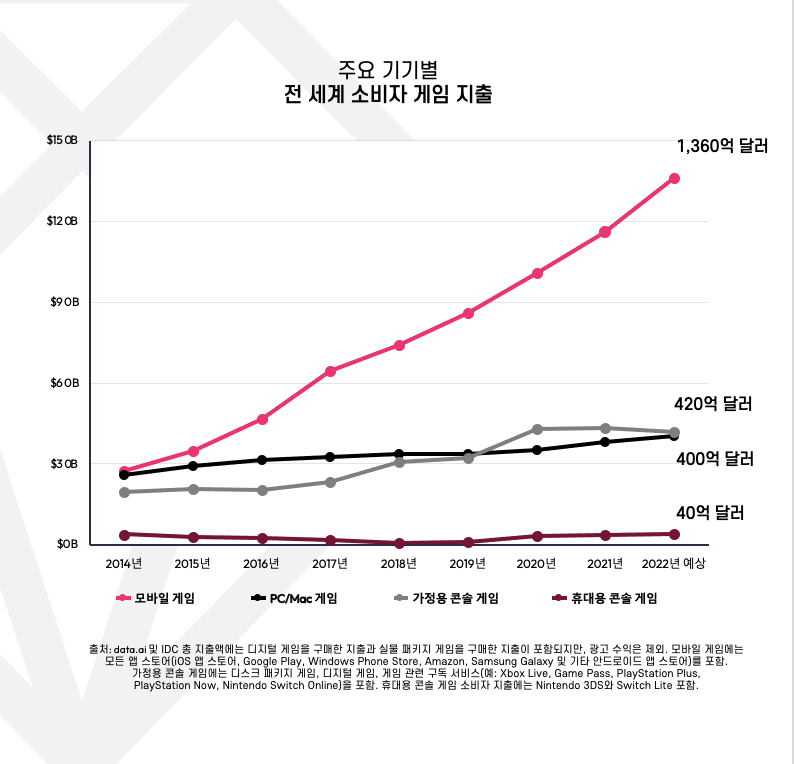

출처 : https://www.data.ai/kr/insights/mobile-gaming/2022-gaming-spotlight-report/